In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [119]:
df = pd.read_csv('ford1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,4,2017,12000.0,0,15944.0,2,150,57.7,1.0
1,5,2015,7830.0,1,50124.0,0,0,74.3,1.5
2,4,2016,10798.0,1,11843.0,2,0,65.7,1.0
3,5,2019,15495.0,1,5600.0,2,145,60.1,1.0
4,0,2013,5698.0,1,44901.0,2,145,47.1,1.4
...,...,...,...,...,...,...,...,...,...
372,2,2017,9298.0,1,16770.0,2,145,44.8,1.5
373,0,2014,7498.0,2,33023.0,2,160,44.1,1.6
374,4,2019,14698.0,1,8725.0,2,145,58.9,1.0
375,5,2017,11995.0,1,23469.0,2,125,51.4,1.5


In [120]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.00000,377.000000,377.000000
mean,5.687003,2017.140584,12882.128376,1.029178,20840.905229,1.286472,114.94695,57.718568,1.361538
std,3.501924,1.568938,4171.620044,0.344713,14661.701999,0.957975,57.93657,8.954505,0.400904
min,0.000000,2013.000000,4699.000000,0.000000,7.000000,0.000000,0.00000,34.400000,1.000000
25%,4.000000,2016.000000,9698.000000,1.000000,9781.000000,0.000000,125.00000,53.300000,1.000000
50%,5.000000,2017.000000,12198.000000,1.000000,17028.000000,2.000000,145.00000,58.900000,1.200000
75%,7.000000,2018.000000,15984.000000,1.000000,29326.000000,2.000000,145.00000,64.200000,1.600000
max,16.000000,2020.000000,25706.397718,2.000000,66207.067810,2.000000,240.00000,80.700000,2.300000


In [121]:
df['age']=(2021-df['year'])
df['priceLevel']=np.where (df['price']<=12882,0,1)
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age,priceLevel
0,4,2017,12000.0,0,15944.0,2,150,57.7,1.0,4,0
1,5,2015,7830.0,1,50124.0,0,0,74.3,1.5,6,0
2,4,2016,10798.0,1,11843.0,2,0,65.7,1.0,5,0
3,5,2019,15495.0,1,5600.0,2,145,60.1,1.0,2,1
4,0,2013,5698.0,1,44901.0,2,145,47.1,1.4,8,0
...,...,...,...,...,...,...,...,...,...,...,...
372,2,2017,9298.0,1,16770.0,2,145,44.8,1.5,4,0
373,0,2014,7498.0,2,33023.0,2,160,44.1,1.6,7,0
374,4,2019,14698.0,1,8725.0,2,145,58.9,1.0,2,1
375,5,2017,11995.0,1,23469.0,2,125,51.4,1.5,4,0


In [122]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['model','year','price','type','distance','fuel','tax','miles per galoon', 'size', 'age', 'priceLevel']).round()

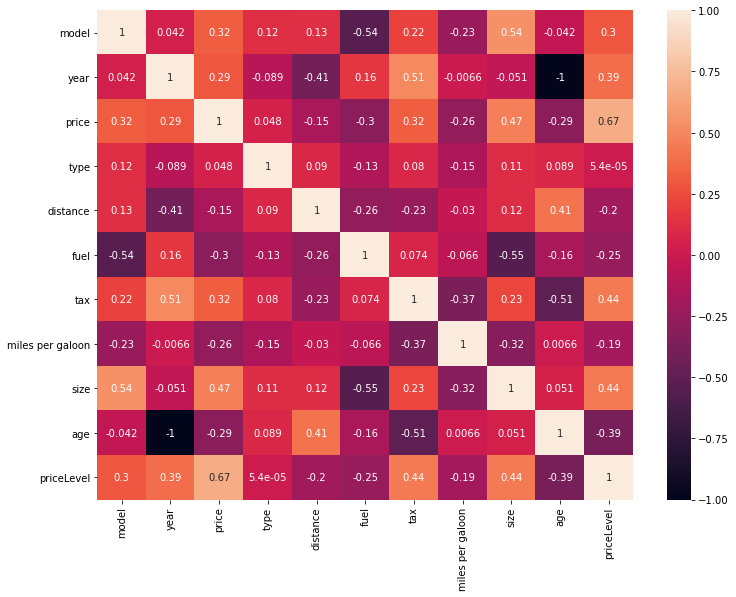

In [123]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

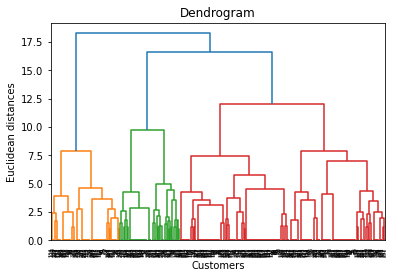

In [124]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [125]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [126]:
hc

array([1, 0, 0, 3, 0, 3, 5, 0, 3, 3, 5, 2, 3, 3, 4, 2, 1, 1, 0, 0, 0, 1,
       1, 4, 0, 1, 3, 0, 0, 0, 1, 3, 4, 2, 0, 0, 2, 4, 3, 3, 0, 0, 3, 0,
       3, 1, 1, 3, 2, 5, 0, 5, 0, 1, 1, 2, 1, 4, 0, 1, 1, 1, 5, 1, 1, 1,
       5, 1, 5, 1, 3, 1, 4, 3, 1, 1, 1, 5, 1, 3, 3, 2, 0, 0, 0, 4, 1, 3,
       0, 3, 0, 2, 0, 4, 0, 1, 1, 1, 3, 1, 0, 2, 1, 3, 2, 2, 0, 5, 0, 1,
       3, 0, 4, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 3, 1, 5, 0, 4, 0,
       5, 5, 0, 3, 1, 1, 0, 5, 1, 1, 3, 5, 1, 4, 3, 1, 3, 3, 0, 0, 1, 3,
       0, 1, 4, 1, 5, 1, 1, 1, 1, 0, 4, 0, 0, 4, 2, 3, 4, 1, 5, 4, 1, 1,
       1, 1, 4, 1, 2, 1, 1, 2, 1, 1, 3, 1, 4, 1, 3, 0, 4, 1, 5, 3, 0, 1,
       1, 0, 1, 3, 0, 2, 1, 3, 4, 3, 1, 5, 0, 5, 1, 0, 1, 1, 1, 1, 3, 1,
       4, 1, 1, 1, 4, 3, 1, 1, 1, 5, 4, 0, 0, 5, 1, 1, 1, 1, 1, 0, 1, 5,
       3, 1, 3, 1, 3, 2, 1, 1, 5, 3, 0, 3, 1, 2, 1, 1, 0, 2, 1, 3, 4, 2,
       3, 3, 4, 2, 0, 3, 3, 1, 1, 1, 1, 1, 0, 4, 0, 3, 1, 5, 2, 3, 3, 0,
       0, 1, 1, 3, 4, 3, 0, 0, 3, 3, 3, 5, 3, 1, 1,

In [127]:
# Less features
X = df.iloc[:, [2,7,9]]

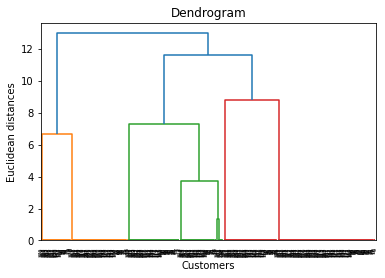

In [128]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [129]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [130]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('1-ford-cluster.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()